In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from math import sqrt
from pprint import pprint

#regression_algorithms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('hour.csv')

In [3]:
#info about the columns of the df & checking for null values in all columns
data.info()
statistica_measurements = data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


# Exploring features or Explorative data analysis with plots

In [4]:
#exploring the categorical features
columns = ['yr','season','holiday','workingday','weathersit', 'hr', 'weekday']
for column in columns:
    print(data[column].value_counts())

1    8734
0    8645
Name: yr, dtype: int64
3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64
0    16879
1      500
Name: holiday, dtype: int64
1    11865
0     5514
Name: workingday, dtype: int64
1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64
16    730
17    730
15    729
13    729
14    729
22    728
18    728
19    728
20    728
21    728
23    728
12    728
7     727
8     727
9     727
10    727
11    727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: hr, dtype: int64
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: weekday, dtype: int64


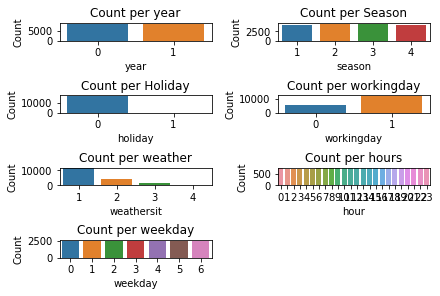

In [5]:
#plotting the categorical values

fig, axes = plt.subplots(4, 2, constrained_layout=True)
sns.countplot(x = 'yr', data = data, ax = axes[0, 0])
axes[0, 0].set(xlabel = 'year', ylabel = 'Count', title = 'Count per year')
sns.countplot(x = 'season', data = data, ax = axes[0, 1])
axes[0, 1].set(xlabel = 'season', ylabel = 'Count', title = 'Count per Season')
sns.countplot(x = 'holiday', data = data, ax = axes[1, 0])
axes[1, 0].set(xlabel = 'holiday', ylabel = 'Count', title = 'Count per Holiday')
sns.countplot(x = 'workingday', data = data, ax = axes[1, 1])
axes[1, 1].set(xlabel = 'workingday', ylabel = 'Count', title = 'Count per workingday')
sns.countplot(x = 'weathersit', data = data, ax = axes[2, 0])
axes[2, 0].set(xlabel = 'weathersit', ylabel = 'Count', title = 'Count per weather')
sns.countplot(x = 'hr', data = data, ax = axes[2, 1])
axes[2, 1].set(xlabel = 'hour', ylabel = 'Count', title = 'Count per hours')
sns.countplot(x = 'weekday', data = data, ax = axes[3, 0])
axes[3, 0].set(xlabel = 'weekday', ylabel = 'Count', title = 'Count per weekday')
fig.delaxes(axes[3, 1])
#plt.subplot_tool()

Text(0.5, 1.0, 'Variation of humidity')

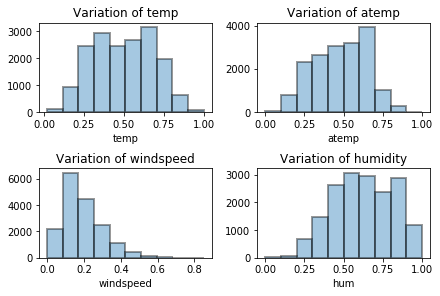

In [6]:
#exploring the continuous valued features separately and also via boxplots
fig, axes = plt.subplots(2, 2, constrained_layout=True)
sns.distplot(a = data['temp'],bins = 10, kde = False, hist_kws = dict(edgecolor="k", linewidth=2), ax = axes[0, 0])
axes[0, 0].set_title("Variation of temp")
sns.distplot(a = data['atemp'],bins = 10, kde = False, hist_kws = dict(edgecolor="k", linewidth=2), ax = axes[0, 1])
axes[0, 1].set_title("Variation of atemp")
sns.distplot(a = data['windspeed'],bins = 10, kde = False, hist_kws = dict(edgecolor="k", linewidth=2), ax = axes[1, 0])
axes[1, 0].set_title("Variation of windspeed")
sns.distplot(a = data['hum'],bins = 10, kde = False, hist_kws = dict(edgecolor="k", linewidth=2), ax = axes[1, 1])
axes[1, 1].set_title("Variation of humidity")

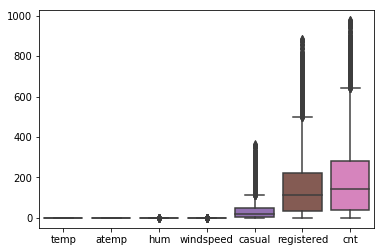

In [7]:
sns.boxplot(data=data[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])

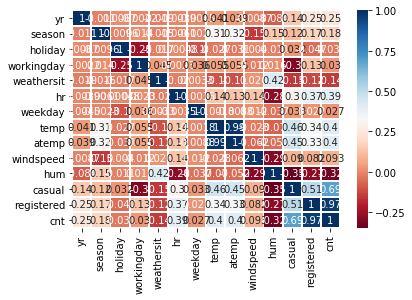

In [8]:
#checking the correlation matrix among all the categorical & continuous values
var_corr = data[['yr','season','holiday','workingday','weathersit', 'hr', 'weekday',
                 'temp', 'atemp', 'windspeed', 'hum', 'casual', 'registered', 'cnt']].corr()
sns.heatmap(var_corr, xticklabels=var_corr.columns, yticklabels=var_corr.columns, cmap = 'RdBu',
             annot=True, linewidths = 0.9)

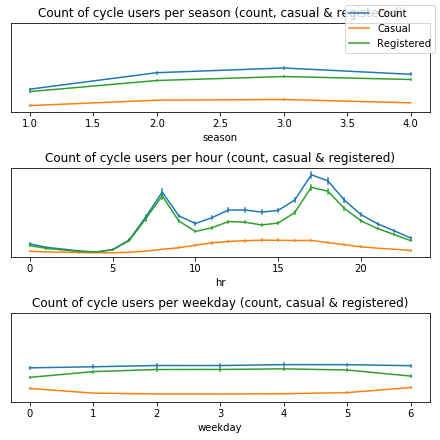

In [9]:
fig, (axes1, axes2, axes3) = plt.subplots(nrows=3, constrained_layout=True, sharey = True, figsize=(6, 6))
labels = ['Count', 'Casual', 'Registered']
sns.lineplot(x = 'season', y = 'cnt', data = data,  err_style="bars", ax = axes1)
sns.lineplot(x = 'season', y = 'casual', data = data,  err_style="bars", ax = axes1)
sns.lineplot(x = 'season', y = 'registered', data = data,  err_style="bars", ax = axes1)
axes1.get_yaxis().set_visible(False)
axes1.set_title('Count of cycle users per season (count, casual & registered)')
sns.lineplot(x = 'hr', y = 'cnt', data = data,  err_style="bars", ax = axes2)
sns.lineplot(x = 'hr', y = 'casual', data = data,  err_style="bars", ax = axes2)
sns.lineplot(x = 'hr', y = 'registered', data = data,  err_style="bars", ax = axes2)
axes2.get_yaxis().set_visible(False)
axes2.set_title('Count of cycle users per hour (count, casual & registered)')
sns.lineplot(x = 'weekday', y = 'cnt', data = data,  err_style="bars", ax = axes3)
sns.lineplot(x = 'weekday', y = 'casual', data = data,  err_style="bars", ax = axes3)
sns.lineplot(x = 'weekday', y = 'registered', data = data,  err_style="bars", ax = axes3)
axes3.get_yaxis().set_visible(False)
axes3.set_title('Count of cycle users per weekday (count, casual & registered)')
fig.legend(labels,loc = 'upper right')

Text(0.5, 1.0, 'Count of poeple depending on Temperature')

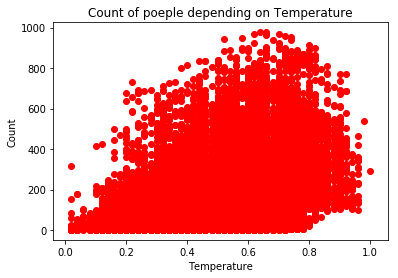

In [10]:
plt.scatter(x = 'temp', y = 'cnt', data = data, color = 'red')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Count of poeple depending on Temperature')

[Text(0.5, 1.0, 'Boxplot for working day')]

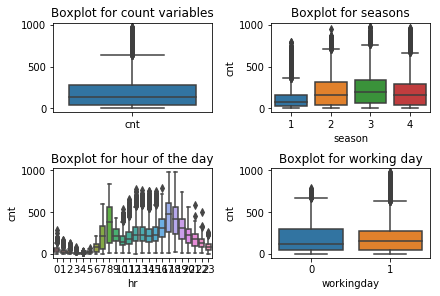

In [11]:
#checking for outliers
fig, axes = plt.subplots(2,2, constrained_layout=True)
sns.boxplot(data=data[['cnt']], ax=axes[0,0])
axes[0,0].set(title="Boxplot for count variables")
sns.boxplot(x=data['season'],y=data['cnt'], ax=axes[0, 1])
axes[0,1].set(title="Boxplot for seasons")
sns.boxplot(x=data['hr'],y=data['cnt'], ax=axes[1, 0])
axes[1,0].set(title="Boxplot for hour of the day")
sns.boxplot(x=data['workingday'],y=data['cnt'], ax=axes[1, 1])
axes[1,1].set(title="Boxplot for working day")

# Building the model

In [12]:
#dropping the columns we don't need
#we are dropping casual & registered since we have to apply regression & predict cnt, making them less important
#we drop atemp since it is highly correlated to temp, hence leading to multicollinearity
data = data.drop(['instant', 'dteday', 'casual', 'registered', 'atemp'], axis = 1)

In [13]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [0,1,2,3,4,5,6,7])
X = onehotencoder.fit_transform(data).toarray()

C:\Users\kashy\Anaconda3\envs\py36\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\kashy\Anaconda3\envs\py36\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [ ]:
#An alternate method for doing onehotencoding for avoiding dummy variable trap
'''
def dummy_ohe(df, column):
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column, drop_first=True)],axis=1)
    df = df.drop([column], axis=1)
    return df

columns_dummy = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for column in columns_dummy:
    dummy = dummy_ohe(dummy, column)
'''

In [14]:
x = X[:, :-1]
y = X[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=15)

In [15]:
models=[RandomForestRegressor(),AdaBoostRegressor(),SVR(),KNeighborsRegressor(), LinearRegression(), DecisionTreeRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','SVR','KNeighborsRegressor', 'MultilinearRegressor', 'DecisionTreeRegressor']

In [16]:
r2_value = []
rmse = []
output = {}
for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    r2_value.append(r2_score(y_test, y_pred))
    rmse.append(sqrt(mean_squared_error(y_test, y_pred)))
output={'Algorithm':model_names,'R2_score':r2_value, 'RMSE': rmse}
output = pd.DataFrame(output)

C:\Users\kashy\Anaconda3\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kashy\Anaconda3\envs\py36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


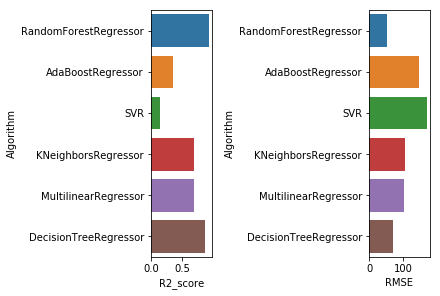

In [17]:
fig, (axes1, axes2) = plt.subplots(ncols = 2,constrained_layout=True)
sns.barplot(x = 'R2_score', y = 'Algorithm', data = output,ax = axes1)
sns.barplot(x = 'RMSE', y = 'Algorithm', data = output, ax = axes2)

In [ ]:
#An alternate method for calculating the r2 score
'''
def test_algorithms(model):
    kfold = KFold(n_splits=10, random_state=5)
    predicted = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')
    print(predicted.mean())
for model in models:
    test_algorithms(model)
'''

In [18]:
#A Separate implementation of Random Forest Regressor
rfregressor = RandomForestRegressor(n_estimators = 500, random_state = 0)
rfregressor.fit(x_train, y_train)
rf_y_pred = rfregressor.predict(x_test)
r2_score(y_test, rf_y_pred)

0.925280548978035

In [19]:
#Mean absolute deviation
y_test1 = pd.Series(y_test)
print('MAD for real test data:', y_test1.mad())

rf_y_pred1 = pd.Series(rf_y_pred)
print('MAD for predicted data:', rf_y_pred1.mad())

MAD for real test data: 141.7972823278777
MAD for predicted data: 133.23235319669985


In [21]:
pprint(rfregressor.get_params())

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


# Hyperparameter Tuning with both RandomizedSearchCV

##  RandomizedSearchCV

In [22]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [23]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [24]:
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [500, 555, 611, 666, 722, 777, 833, 888, 944, 1000]}


In [25]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)

Since the search takes a bit of time, I ran it once and the optimal results are:

{'n_estimators': 833,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [ ]:
# Fit the random search model
rf_random.fit(x_train, y_train)

In [ ]:
#Displaying the best parameters
rf_random.best_params_

In [35]:
#With the best parameters
rfregressor_randcv = RandomForestRegressor(n_estimators = 833, min_samples_split = 2, min_samples_leaf = 1,
                                     max_features = 'auto', max_depth = 100, bootstrap = True, random_state = 0)
rfregressor_randcv.fit(x_train, y_train)
rf_y_pred_randcv = rfregressor_randcv.predict(x_test)
r2_score(y_test, rf_y_pred_randcv)

0.9252038673788033

In [38]:
#Mean absolute deviation
y_test1 = pd.Series(y_test)
print('MAD for real test data:', y_test1.mad())

rf_y_pred_randcv = pd.Series(rf_y_pred_randcv)
print('MAD for test data with best params:', rf_y_pred_randcv.mad())

MAD for real test data: 141.7972823278777
MAD for test data with best params: 133.20475240363407
